In [41]:
from apportionment import *

In [42]:
# raw2visualisable("1m-2020.csv", weighted=True, only_electable=False, neglected=[12], year=2020, suff="12x")
# raw2visualisable("1m-2020.csv", weighted=True, only_electable=False, neglected=[15], year=2020, suff="15x")
# raw2visualisable("1m-2023.csv", weighted=True, only_electable=False, neglected=[18], year=2023, suff="16x")
# raw2visualisable("1m-2023.csv", weighted=True, only_electable=False, neglected=[18], year=2023, suff="18x")
# raw2visualisable("1m-2023.csv", weighted=True, only_electable=False, neglected=[18], year=2023, suff="20x")
# raw2visualisable("1m-2023.csv", weighted=True, only_electable=False, neglected=[25], year=2023, suff="25x")

# raw2visualisable("1m-2020.csv", weighted=True, only_electable=False, neglected=[x for x in range(constants.subjects[2020]) if x != 12], year=2020, suff="12")
# raw2visualisable("1m-2020.csv", weighted=True, only_electable=False, neglected=[x for x in range(constants.subjects[2020]) if x != 15], year=2020, suff="15")
# raw2visualisable("1m-2023.csv", weighted=True, only_electable=False, neglected=[x for x in range(constants.subjects[2023]) if x != 16], year=2023, suff="16")
# raw2visualisable("1m-2023.csv", weighted=True, only_electable=False, neglected=[x for x in range(constants.subjects[2023]) if x != 18], year=2023, suff="18")
# raw2visualisable("1m-2023.csv", weighted=True, only_electable=False, neglected=[x for x in range(constants.subjects[2023]) if x != 20], year=2023, suff="20")
# raw2visualisable("1m-2023.csv", weighted=True, only_electable=False, neglected=[x for x in range(constants.subjects[2023]) if x != 25], year=2023, suff="25")

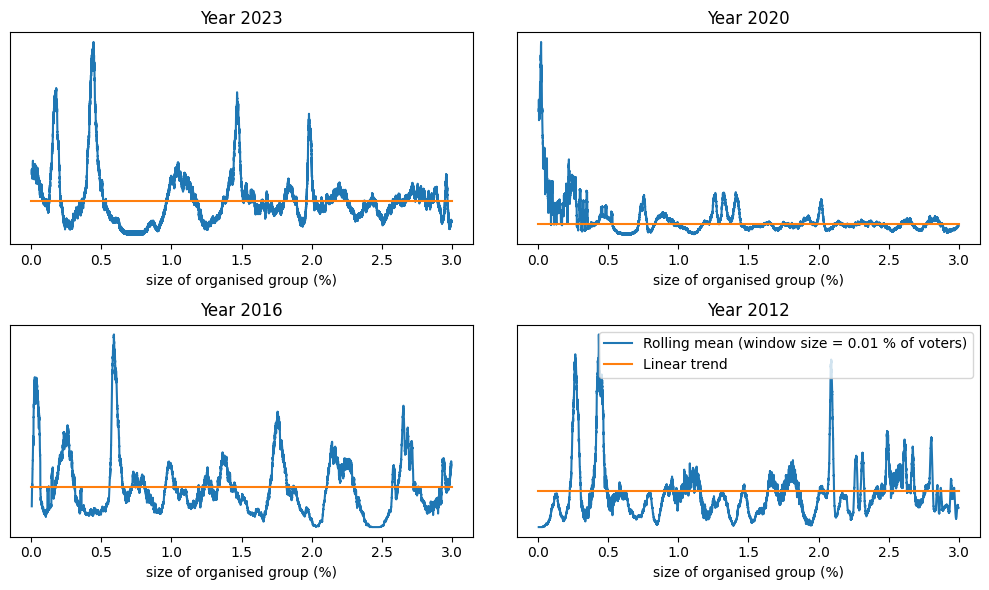

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.ravel() #flatens indexing

for i, year in enumerate([2023, 2020, 2016, 2012]):
    df = pd.read_csv(f"./vis_data/weighted-vis-1m-{year}.csv")


    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals =  y_values - (3 * x_values)

    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=100, center=True).mean()

    x = np.arange(0, 4)
    y = 3 * x
    
    # axs[i].plot(x_values, y_deriv, '-', markersize=1, label="First difference")
    axs[i].plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")
    axs[i].plot(x, y * 0, label='Linear trend')

    axs[i].set_xlabel('size of organised group (%)')
    axs[i].set_title(f'Year {year}')

    axs[i].set_yticks([])

plt.legend()
plt.tight_layout()  # Adjust subplot spacing for better visibility
plt.show()

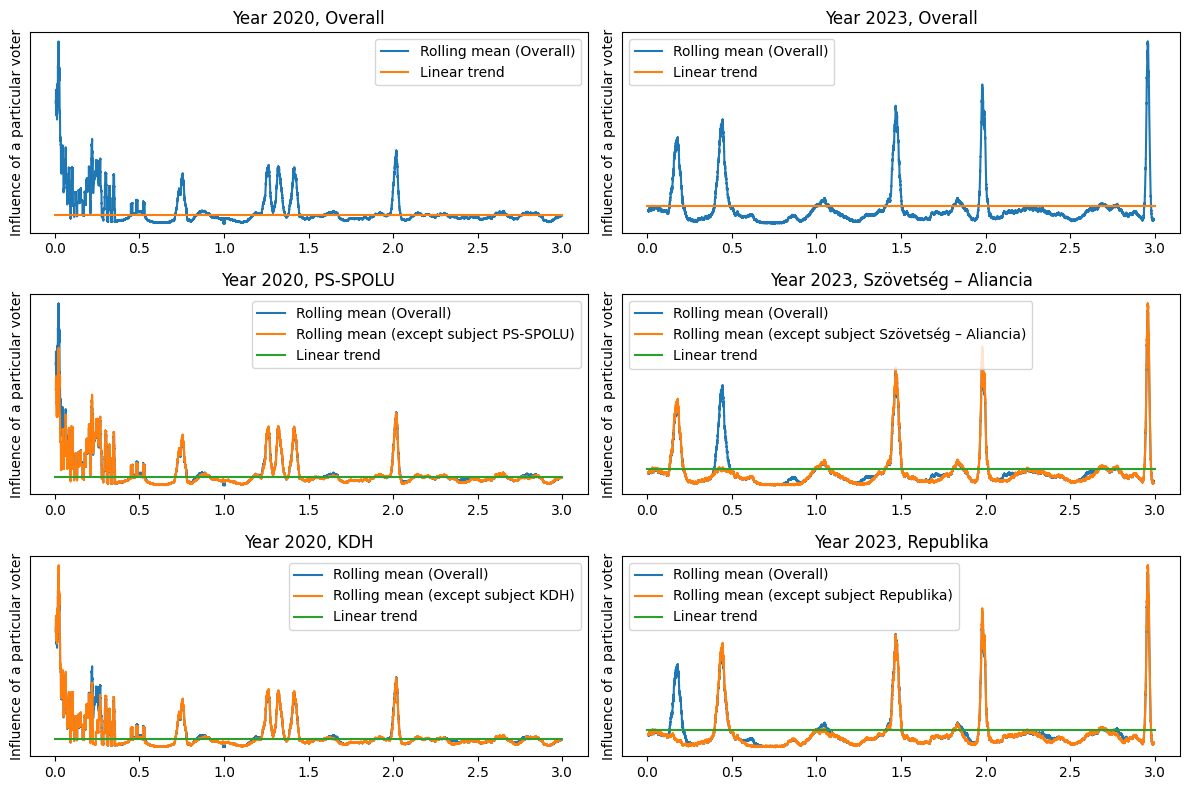

In [56]:
subn_subject = {
    12: "PS-SPOLU",
    15: "KDH",
    18: "Szövetség – Aliancia",
    25: "Republika"
}

def plot_data(year, subject, ax):
    # Load data with or without subject-specific files
    if subject:
        df = pd.read_csv(f"./vis_data/unweighted-vis-1m-{year}.csv{subject}x")
        df2 = pd.read_csv(f"./vis_data/unweighted-vis-1m-{year}.csv")
    else:
        df = pd.read_csv(f"./vis_data/unweighted-vis-1m-{year}.csv")

    # Calculate values
    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals = y_values - (3 * x_values)
    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=100, center=True).mean()

    if subject:
        y_values2 = df2['diff']
        y_vals2 = y_values2 - (3 * x_values)
        y_deriv2 = y_vals2.diff()
        y_rolling2 = y_deriv2.rolling(window=100, center=True).mean()

    # Plot data
    x = np.arange(0, 4)
    y = 3 * x
    if subject:     
        ax.plot(x_values, y_rolling2, '-', markersize=1, label=f"Rolling mean (Overall)")
    ax.plot(x_values, y_rolling, '-', markersize=1, label=f"Rolling mean ({'except subject ' + subn_subject[subject] if subject else 'Overall'})")
    ax.plot(x, y * 0, label='Linear trend')

    ax.set_ylabel('Influence of a particular voter')
    ax.set_title(f'Year {year}, {subn_subject[subject] if subject else "Overall"}')
    ax.set_yticks([])

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

# Plot data for each year in both columns of each row
years = [2020, 2023]
subjects = [None, 12, 15, 18, 25]

# First row: overall year data
for i, year in enumerate(years):
    plot_data(year, None, axs[0, i])

# Second row: subject 12 and 15 for 2020
plot_data(2020, 12, axs[1, 0])
plot_data(2020, 15, axs[2, 0])

# Third row: subject 18 and 25 for 2023
plot_data(2023, 18, axs[1, 1])
plot_data(2023, 25, axs[2, 1])

# Show legend and plot
for ax in axs.flat:
    ax.legend()

plt.tight_layout()
plt.show()


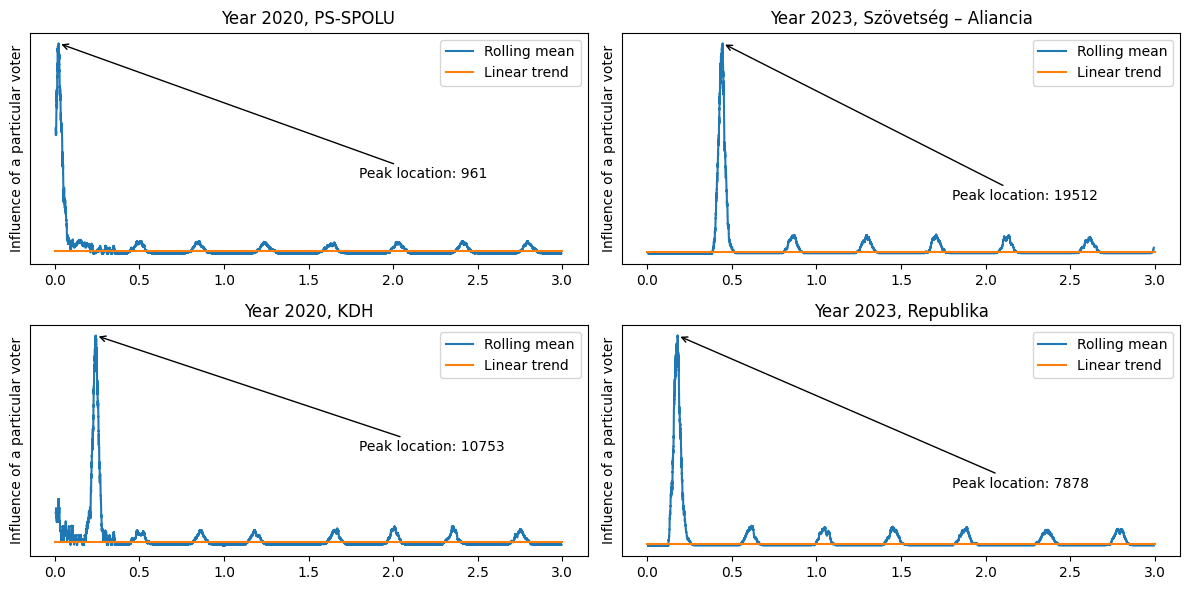

In [58]:
subn_subject = {
    12: "PS-SPOLU",
    15: "KDH",
    18: "Szövetség – Aliancia",
    25: "Republika"
}

def plot_data(year, subject, ax):
    # Load data with or without subject-specific files
    df = pd.read_csv(f"./vis_data/unweighted-vis-1m-{year}.csv{subject}")
    
    # Calculate values
    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals = y_values - (3 * x_values)
    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=100, center=True).mean()

    # Plot data
    x = np.arange(0, 4)
    y = 3 * x
    ax.plot(x_values, y_rolling, '-', markersize=1, label=f"Rolling mean")
    ax.plot(x, y * 0, label='Linear trend')

    ax.set_ylabel('Influence of a particular voter')
    ax.set_title(f'Year {year}, {subn_subject[subject]}')
    ax.set_yticks([])

    # Uncomment and adjust annotations as needed
    max_index = y_rolling.idxmax()
    ax.annotate(f'Peak location: {int(max_index * (constants.all_voters[int(year)] / 1000000))}', 
                xy=(x_values[max_index], y_rolling[max_index]),
                xytext=(1.8, 0.01),
                arrowprops=dict(facecolor='black', arrowstyle='->'))

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Plot data for each year in both columns of each row
years = [2020, 2023]

# Second row: subject 12 and 15 for 2020
plot_data(2020, 12, axs[0, 0])
plot_data(2020, 15, axs[1, 0])

# Third row: subject 18 and 25 for 2023
plot_data(2023, 18, axs[0, 1])
plot_data(2023, 25, axs[1, 1])

# Show legend and plot
for ax in axs.flat:
    ax.legend()

plt.tight_layout()
plt.show()


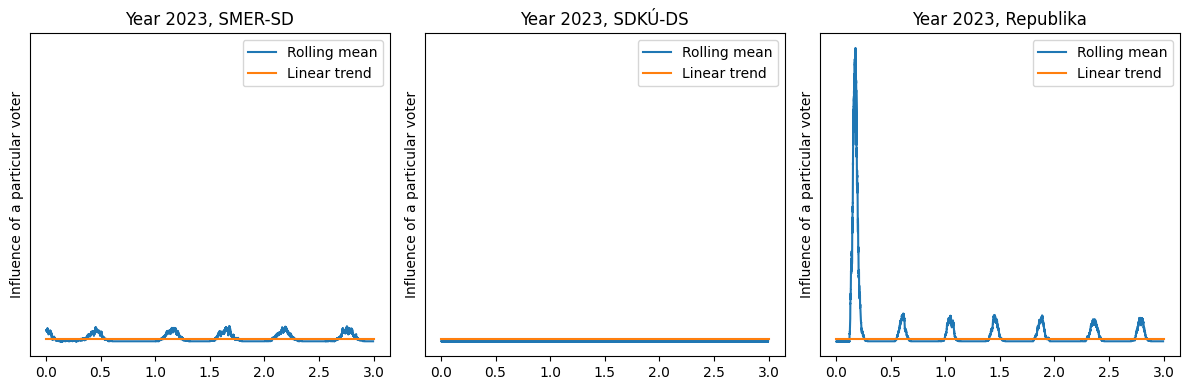

In [59]:
subn_subject = {
    16: "SMER-SD",
    20: "SDKÚ-DS",
    25: "Republika"
}

def plot_data(year, subject, ax):
    # Load data with or without subject-specific files
    file_path = f"./vis_data/weighted-vis-1m-{year}.csv{subject}"
    df = pd.read_csv(file_path)
    
    # Calculate values
    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals = y_values - (3 * x_values)
    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=100, center=True).mean()

    # Plot data
    x = np.arange(0, 4)
    y = 3 * x
    ax.plot(x_values, y_rolling, '-', markersize=1, label=f"Rolling mean")
    ax.plot(x, y * 0, label='Linear trend')

    ax.set_ylabel('Influence of a particular voter')
    ax.set_title(f'Year {year}, {subn_subject[subject]}')
    ax.set_yticks([])

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

# Plot data for the year 2023 and subjects 16, 20, 25
subjects = [16, 20, 25]

for i, subject in enumerate(subjects):
    plot_data(2023, subject, axs[i])

# Show legend and plot
for ax in axs.flat:
    ax.legend()

plt.tight_layout()
plt.show()


In [47]:
from scipy.signal import find_peaks

def plot_data(year, subject):
    # Load data with or without subject-specific files
    file_path = f"./vis_data/weighted-vis-1m-{year}.csv{subject}"
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None, None, None
    
    # Check if necessary columns exist
    if 'samples' not in df.columns or 'diff' not in df.columns:
        print(f"Columns 'samples' or 'diff' not found in the file: {file_path}")
        return None, None, None
    
    # Multiplier
    multiplier = constants.all_voters[year] / 1000000
    
    # Calculate values
    x_values = df['samples'] * multiplier  # Convert to actual votes
    y_values = df['diff']
    y_vals = y_values - (3 * (x_values / 1000000) * 100)
    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=100, center=True).mean()

    # Detect peaks
    peaks, _ = find_peaks(y_rolling, distance=1000, prominence=0.001)
    peak_x = x_values.iloc[peaks]
    peak_y = y_rolling[peaks]

    # Calculate gaps
    gaps = peak_x.diff().dropna()
    average_gap = gaps.mean() if not gaps.empty else 0
    average_gap_excluding_first = gaps[1:].mean() if len(gaps) > 1 else 0
    
    return len(peak_x), round(average_gap), round(average_gap_excluding_first)

# Initialize a list to store summary data
summary_data = []

final_summary = pd.DataFrame(columns=['Year', 'Average Gap Size', 'Average Gap Size (Excluding First Gap)'])

for year in [2023, 2020, 2016, 2012]:
    # Clear the summary_data list for each year
    summary_data.clear()
    
    # Plot data for the year and subjects from 0 to 25
    for subject in range(constants.subjects[year]):
        num_peaks, avg_gap, avg_gap_ex_first = plot_data(year, subject)
        if num_peaks is not None and num_peaks >= 2:
            summary_data.append([subject, num_peaks, avg_gap, avg_gap_ex_first])

    # Create a DataFrame to display the summary
    summary_df = pd.DataFrame(summary_data, columns=['Subject', 'Number of Peaks', 'Average Gap Size', 'Average Gap Size (Excluding First Gap)'])

    # Calculate total averages
    total_avg_gap = summary_df['Average Gap Size'].mean()
    total_avg_gap_ex_first = summary_df['Average Gap Size (Excluding First Gap)'].mean()

    # Add the averages to the final summary DataFrame
    final_summary = pd.concat([final_summary, pd.DataFrame({'Year': [year], 'Average Gap Size': [round(total_avg_gap)], 'Average Gap Size (Excluding First Gap)': [round(total_avg_gap_ex_first)]})], ignore_index=True)

# Print the final summary table
display(final_summary)


File not found: ./vis_data/weighted-vis-1m-2023.csv0
File not found: ./vis_data/weighted-vis-1m-2023.csv1
File not found: ./vis_data/weighted-vis-1m-2023.csv2
File not found: ./vis_data/weighted-vis-1m-2023.csv3
File not found: ./vis_data/weighted-vis-1m-2023.csv4
File not found: ./vis_data/weighted-vis-1m-2023.csv5
File not found: ./vis_data/weighted-vis-1m-2023.csv6
File not found: ./vis_data/weighted-vis-1m-2023.csv7
File not found: ./vis_data/weighted-vis-1m-2023.csv8
File not found: ./vis_data/weighted-vis-1m-2023.csv9
File not found: ./vis_data/weighted-vis-1m-2023.csv10
File not found: ./vis_data/weighted-vis-1m-2023.csv11
File not found: ./vis_data/weighted-vis-1m-2023.csv12
File not found: ./vis_data/weighted-vis-1m-2023.csv13
File not found: ./vis_data/weighted-vis-1m-2023.csv14
File not found: ./vis_data/weighted-vis-1m-2023.csv15
File not found: ./vis_data/weighted-vis-1m-2023.csv17
File not found: ./vis_data/weighted-vis-1m-2023.csv19
File not found: ./vis_data/weighted-vi

ValueError: cannot convert float NaN to integer

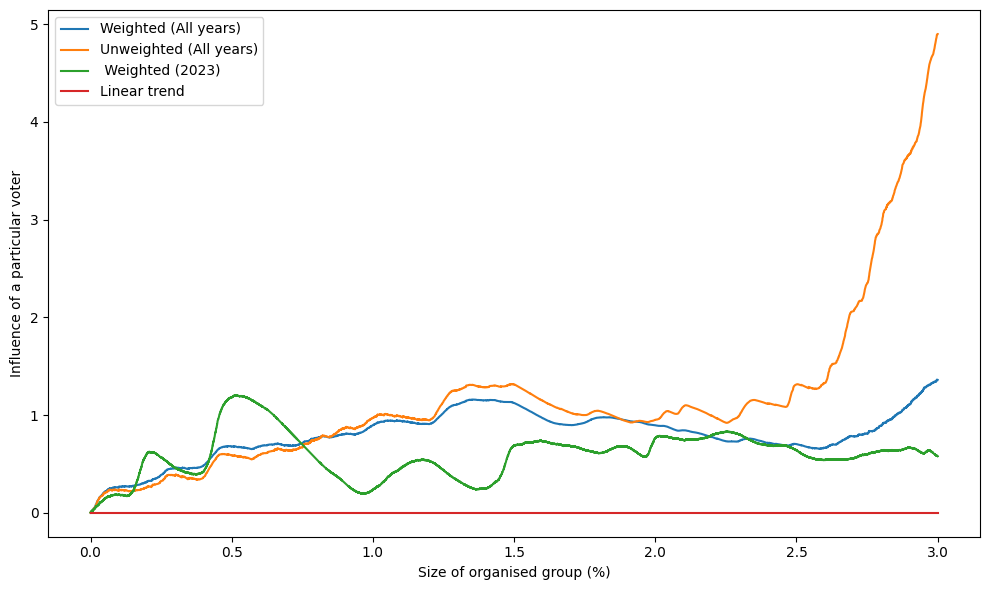

In [53]:
df_list_weighted = [pd.read_csv(f"./vis_data/weighted-vis-1m-{year}.csv") for year in constants.years]
df_list_unweighted = [pd.read_csv(f"./vis_data/unweighted-vis-1m-{year}.csv") for year in constants.years]
df_2023_weighted = pd.read_csv("./vis_data/weighted-vis-1m-2023.csv")

x_values_weighted = (df_list_weighted[0]['samples'] / 1000000) * 100
x_values_unweighted = (df_list_unweighted[0]['samples'] / 1000000) * 100
x_values_2023_weighted = (df_2023_weighted['samples'] / 1000000) * 100

y_values_list_weighted = [df['diff'] for df in df_list_weighted]
y_values_list_unweighted = [df['diff'] for df in df_list_unweighted]
y_values_2023_weighted = df_2023_weighted['diff']

y_values_weighted = (sum(y_values_list_weighted)) / len(y_values_list_weighted)
y_values_unweighted = (sum(y_values_list_unweighted)) / len(y_values_list_unweighted)

y_vals_weighted = y_values_weighted - (3 * x_values_weighted)
y_vals_unweighted = y_values_unweighted - (3 * x_values_unweighted)
y_vals_2023_weighted = y_values_2023_weighted - (3 * x_values_2023_weighted)

y_deriv_weighted = y_vals_weighted.diff()
y_deriv_unweighted = y_vals_unweighted.diff()
y_deriv_2023_weighted = y_vals_2023_weighted.diff()

y_rolling_weighted = y_deriv_weighted.rolling(window=100, center=True).mean()
y_rolling_unweighted = y_deriv_unweighted.rolling(window=100, center=True).mean()
y_rolling_2023_weighted = y_deriv_2023_weighted.rolling(window=100, center=True).mean()

x = np.arange(0, 4)
y = 3 * x

plt.figure(figsize=(10, 6))

plt.plot(x_values_weighted, y_vals_weighted, '-', markersize=1, label="Weighted (All years)")
plt.plot(x_values_unweighted, y_vals_unweighted, '-', markersize=1, label="Unweighted (All years)")
plt.plot(x_values_2023_weighted, y_vals_2023_weighted, '-', markersize=1, label=" Weighted (2023)")
plt.plot(x, y * 0, label='Linear trend')

plt.xlabel('Size of organised group (%)')
plt.ylabel('Influence of a particular voter')
# plt.title('Comparison of Weighted and Unweighted Data')
plt.legend()

plt.tight_layout()
plt.show()
